# loading modules

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.metrics import silhouette_score

from dca.api import dca
import anndata

from benchmarking import *
from helper import *

/home/ubuntu/dca/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ubuntu/dca/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ubuntu/dca/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ubuntu/dca/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ubuntu/dca/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Generating grammar tables from /usr/lib/python3.5/lib2to3/Grammar.txt
Generating grammar tables from /usr/lib/python3.5/lib2to3/PatternGrammar.txt


/home/ubuntu/dca/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ubuntu/dca/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


# parameters

In [2]:
batch_size = 128
learning_rate = 0.0005
epsilon = 0.01

# import data

In [15]:
#expression data
data_path = "/home/ubuntu/single-cell-scVI/data/bipolar/"
expression_train = scipy.sparse.load_npz(data_path + "data_train.npz").A
expression_test = scipy.sparse.load_npz(data_path + "data_test.npz").A

# batch info
b_train = np.loadtxt(data_path + "batch_train") - 1
b_test = np.loadtxt(data_path + "batch_test") - 1

#cluster info
c_train = np.loadtxt(data_path + "c_train")
c_test = np.loadtxt(data_path + "c_test")

# imputation dataset
X_zero, i, j, ix = \
        scipy.sparse.load_npz(data_path + "imputation/X_zero.npz").A,\
        np.load(data_path + "imputation/i.npy"), \
        np.load(data_path + "imputation/j.npy"), \
        np.load(data_path + "imputation/ix.npy")

# Computational graph

In [18]:
train = anndata.AnnData(expression_train)
res = dca(train, verbose=True, mode="latent")

DCA: Successfully preprocessed 13166 genes and 19829 cells.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
count (InputLayer)              (None, 13166)        0                                            
__________________________________________________________________________________________________
enc0 (Dense)                    (None, 64)           842688      count[0][0]                      
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 64)           192         enc0[0][0]                       
__________________________________________________________________________________________________
enc0_act (Activation)           (None, 64)           0           batch_normalization_4[0][0]      
_________________________________________________

# Evaluation methods

In [28]:
latent = train.obsm['X_dca']
print(cluster_scores(latent, len(np.unique(c_train)), c_train))
print(entropy_batch_mixing(latent, b_train))
print(silhouette_score(latent, b_train))

[0.4263949, 0.7829314468416665, 0.4812601239175286]
0.06775370688196845
0.10495388


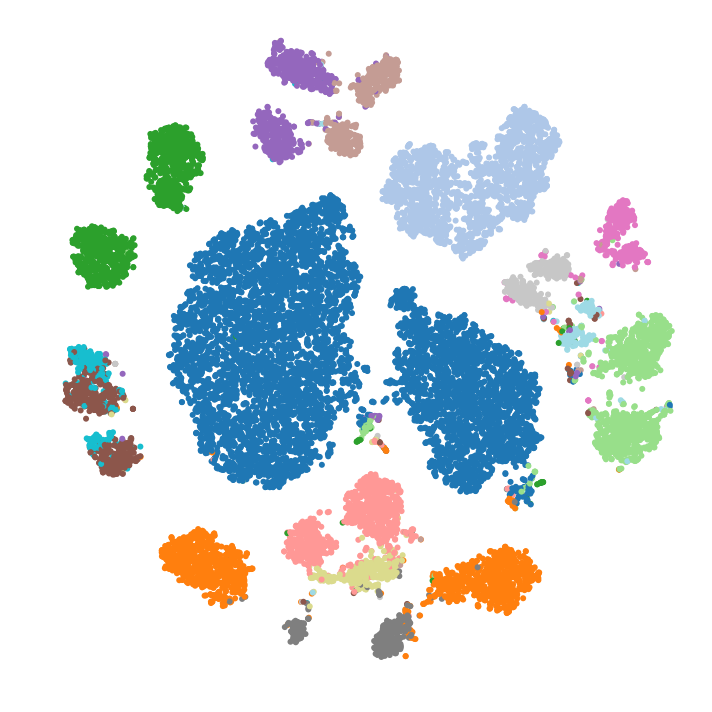

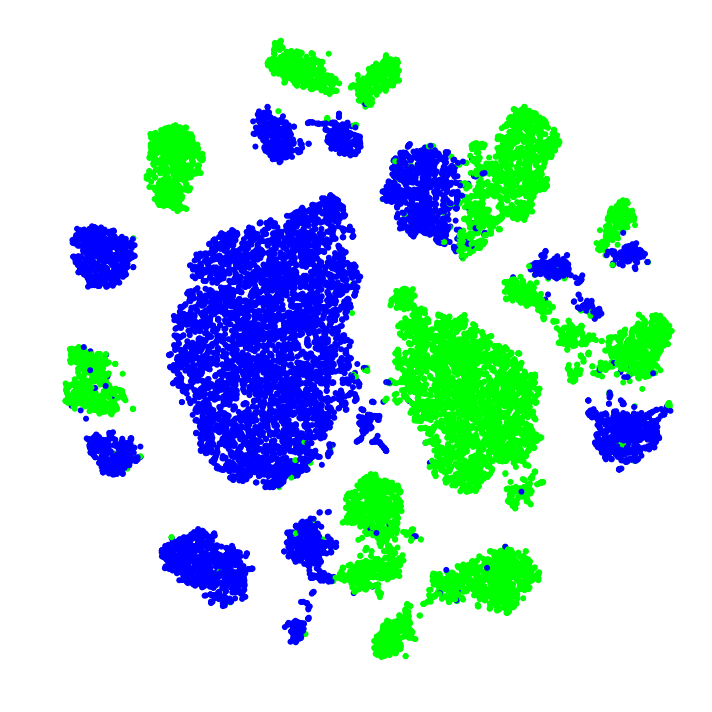

In [29]:
tsne = show_tSNE(latent, c_train, cmap=plt.get_cmap("tab20", 15), return_tSNE=True)
#plt.savefig("scVI_tSNE_bipolar_clusters.pdf", dpi=300)
plt.show()
show_tSNE(tsne, b_train, cmap=plt.get_cmap("brg", 2))
#plt.savefig("scVI_tSNE_bipolar_batch.pdf", dpi=300)

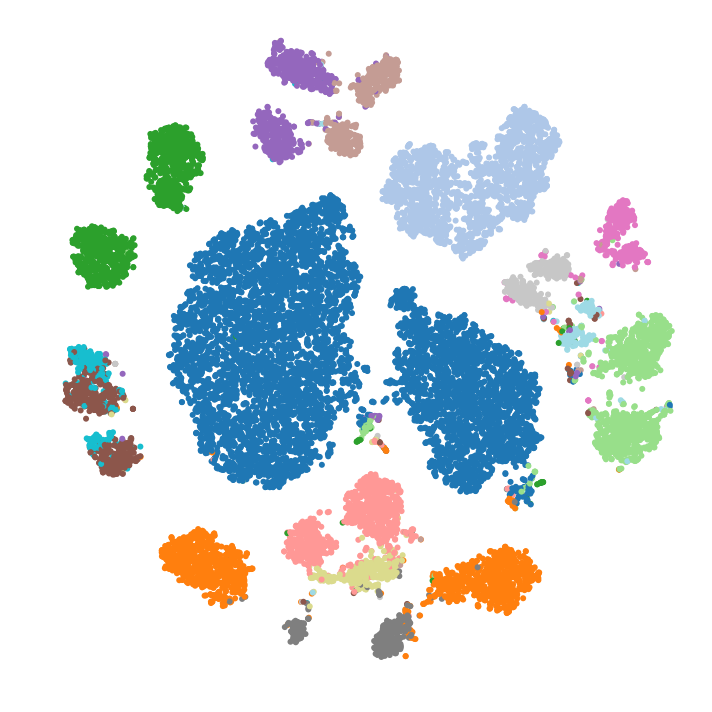

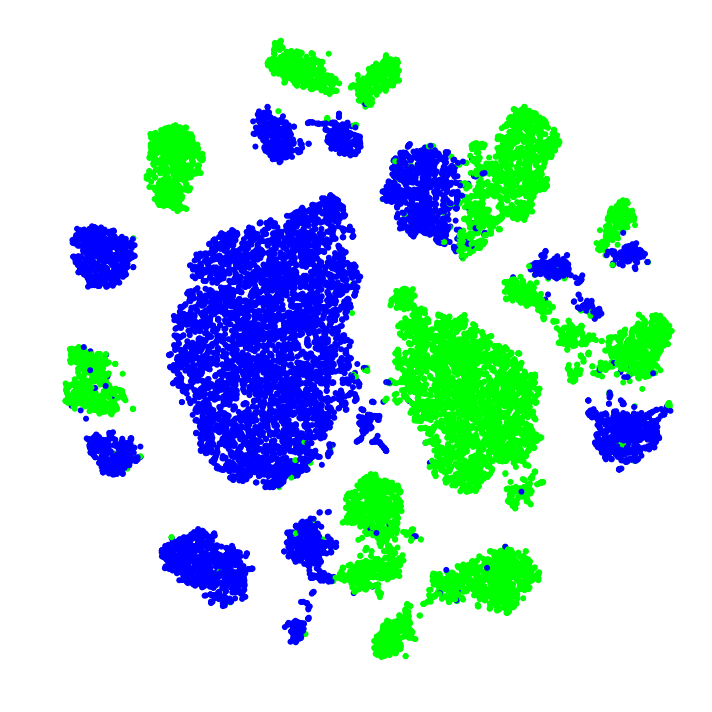

In [30]:
show_tSNE(tsne, c_train, cmap=plt.get_cmap("tab20", 15), return_tSNE=True)
plt.savefig("DCA_tSNE_bipolar_clusters.pdf", dpi=300)
plt.show()
show_tSNE(tsne, b_train, cmap=plt.get_cmap("brg", 2))
plt.savefig("DCA_tSNE_bipolar_batch.pdf", dpi=300)

## Imputation

In [4]:
train = anndata.AnnData(X_zero)
res = dca(train, verbose=True, mode="denoise")

DCA: Successfully preprocessed 13166 genes and 20624 cells.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
count (InputLayer)              (None, 13166)        0                                            
__________________________________________________________________________________________________
enc0 (Dense)                    (None, 64)           842688      count[0][0]                      
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64)           192         enc0[0][0]                       
__________________________________________________________________________________________________
enc0_act (Activation)           (None, 64)           0           batch_normalization_1[0][0]      
_________________________________________________

In [18]:
all_index = i[ix], j[ix]
x, y = train.X[all_index], expression_train[all_index]
np.median(np.abs(x - y))

0.42305729461
